In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [25]:
df=pd.read_csv("C:\\NARESH IT VIDS\\New folder\\kaggle_Interests_group.csv")
df.head()

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN


In [26]:
df.rename(columns={"grand_tot_interests":"interests"},inplace= True)

In [27]:
df["group"].unique()

array(['C', 'P', 'R', 'I'], dtype=object)

In [28]:
df["group"].value_counts()

I    1809
P    1731
C    1725
R    1075
Name: group, dtype: int64

In [32]:
df["group"]=df["group"].map({"R":0,"C":1,"P":2,"I":3})

In [33]:
x=df[["group","interests"]]
x.head()

,group,interests
0,1,17
1,1,43
2,1,27
3,1,34
4,1,36


In [68]:
df.drop_duplicates(inplace= True,ignore_index=True)

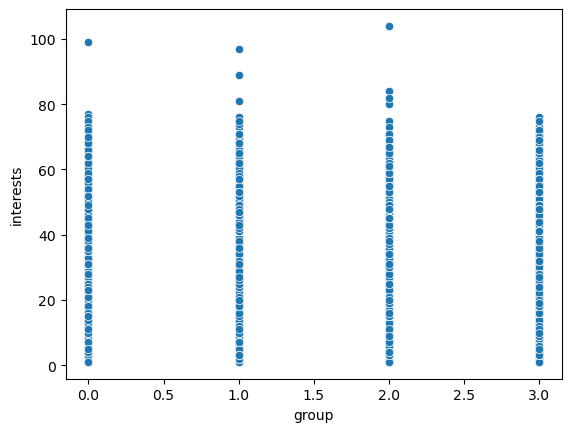

In [69]:
sns.scatterplot(x="group",y="interests",data=df)
plt.show()

In [81]:
df.duplicated().sum()

0

# **CLUSTERING**

1.KMeans clustering

finding optimal number of clusters

In [70]:
wcss=[]

for i in range(1,11):
    from sklearn.cluster import KMeans
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
print(wcss)

[1599285.0047318605, 556142.5580797395, 288438.3667757651, 160226.9815046122, 119653.85052208151, 85355.48400183779, 64398.01232511745, 51707.48593883829, 43962.29041926336, 38359.98856505283]


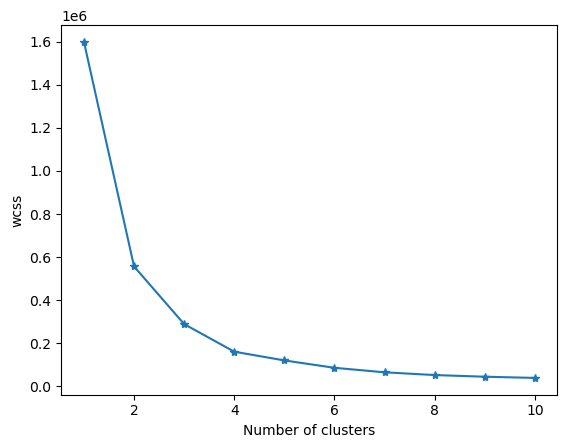

In [71]:
plt.plot(range(1,11),wcss,marker="*")
plt.xtics=(range(1,11))
plt.title=("The Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [72]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=True)

x["km_cluster"]=kmeans.fit_predict(x)

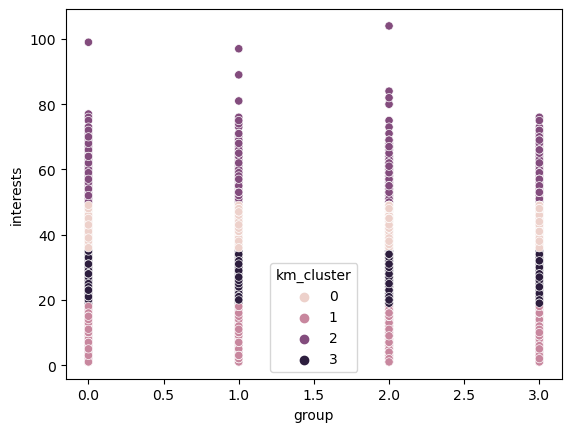

In [73]:
sns.scatterplot(x="group",y="interests",hue="km_cluster",data=x)
plt.show()

 2.Hierachial clustering
    
    finding optimal number of clusters

TypeError: 'str' object is not callable

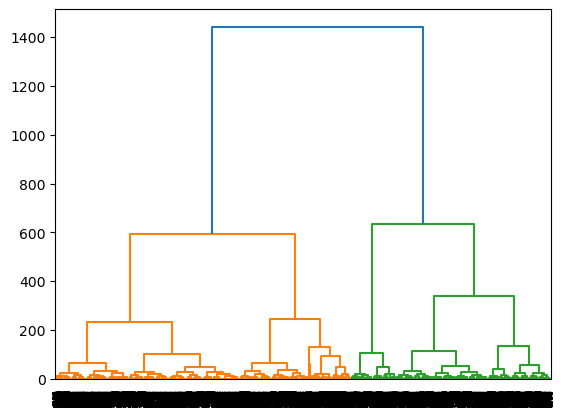

In [75]:
import scipy.cluster.hierarchy as sch
data=sch.linkage(x,method="ward")

dendrogram=sch.dendrogram(data)

plt.title("dendrogram")
plt.xlabel('group')
plt.ylabel("Euclidean distances")
plt.show()       

In [76]:
# Hirarachy clustering model

from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean')


x['h_cluster']=hc.fit_predict(x)

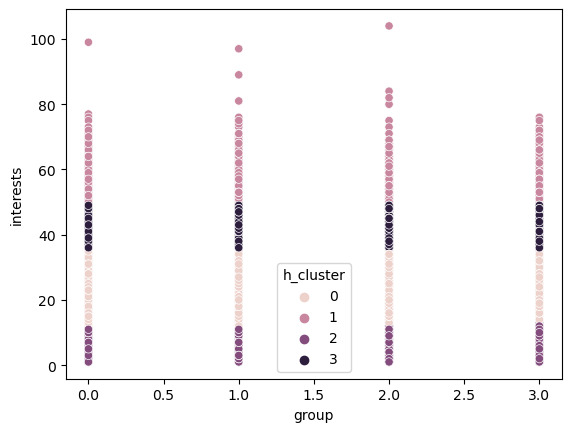

In [77]:
sns.scatterplot(x="group",y="interests",hue="h_cluster",data=x)
plt.show()

# **3.DBSCAN Clustering**



In [78]:
for r in range(1,10):
    for m in range(3,21):
        
        from sklearn.cluster import DBSCAN
        dbs=DBSCAN(eps=r,min_samples=m)
        x["db_cluster"]=dbs.fit_predict(x)
    
    if x["db_cluster"].nunique()==4:
        break
        
print("eps:",r)
print("min:",m)

eps: 3
min: 20


In [79]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=3,min_samples=20)

x["db_cluster"]=dbs.fit_predict(x)


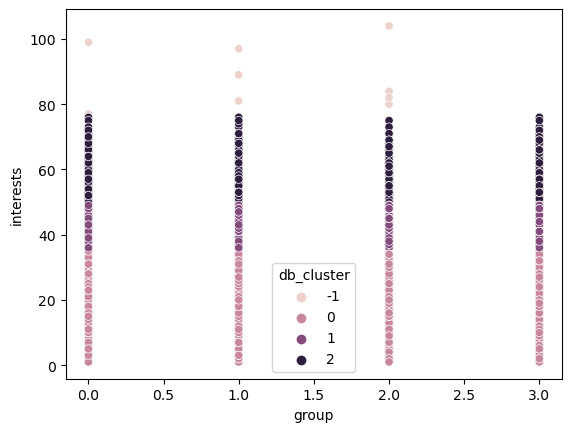

In [80]:
sns.scatterplot(y="interests",x="group",hue="db_cluster",data=x)
plt.show()